# Multi-metric runs
------------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=1, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|    |     dataset |       train |        test |
| -- | ----------- | ----------- | ----------- |
| 0  |   212 (1.0) |   167 (1.0) |    45 (1.0) |
| 1  |   357 (1.7) |   289 (1.7) |    68 (1.5) |



In [4]:
# For every step of the BO, both metrics are calculated,
# but only the first is used for optimization!
atom.run(
    models=["lsvm", "QDA"],
    metric=("f1", "recall"),
    n_calls=10,
    n_initial_points=4,
    n_bootstrap=6,
)


Training ========================= >>
Models: lSVM, QDA
Metric: f1, recall


Running BO for Linear-SVM...
| Call             | penalty |    loss |       C |    dual |      f1 | best f1 |  recall | best recall | time iteration | total time |
| ---------------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ----------- | -------------- | ---------- |
| Initial point 1  |      l2 | squar.. |   0.004 |    True |  0.9812 |  0.9812 |   0.993 |       0.993 |         0.063s |     0.074s |
| Initial point 2  |      l2 |   hinge |   0.087 |    True |  0.9777 |  0.9812 |  0.9861 |       0.993 |         0.062s |     0.280s |
| Initial point 3  |      l2 | squar.. |   0.037 |    True |  0.9828 |  0.9828 |  0.9896 |       0.993 |         0.062s |     0.388s |
| Initial point 4  |      l2 |   hinge |    0.47 |    True |  0.9776 |  0.9828 |  0.9827 |       0.993 |         0.063s |     0.497s |
| Iteration 5      |      l2 | squar.. |   4.418 |    True |  0.9625 |  0.9828 |  0

## Analyze the results

In [5]:
# The columns in the results dataframe contain a list of
# scores, one for each metric (in the same order as called)
atom.results[["metric_bo", "metric_train", "metric_test"]]

,metric_bo,metric_train,metric_test
lSVM,"[0.9846718442114861, 0.9965517241379309]","[0.9913941480206541, 0.9965397923875432]","[0.9784172661870503, 1.0]"
QDA,"[0.963998965582012, 0.9723532970356927]","[0.9691780821917808, 0.9792387543252595]","[0.9784172661870503, 1.0]"


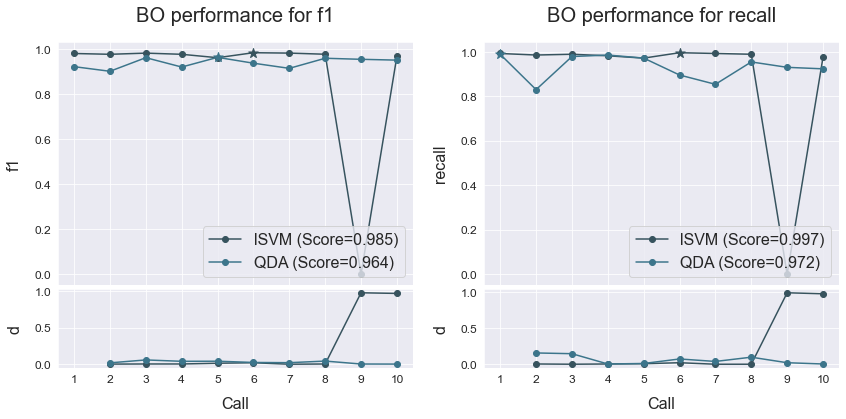

In [6]:
# Some plots allow us to choose the metric we want to show
with atom.canvas():
    atom.plot_bo(metric="f1", title="BO performance for f1")
    atom.plot_bo(metric="recall", title="BO performance for recall")

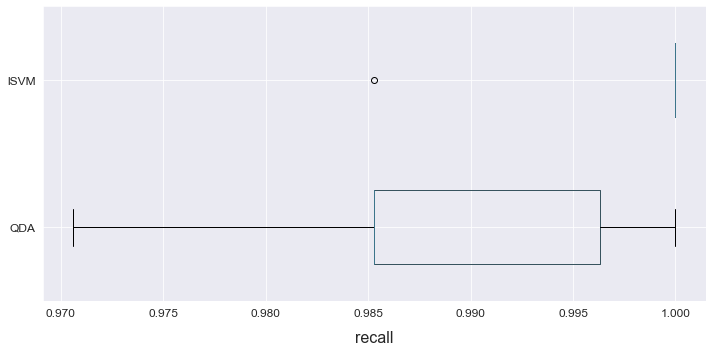

In [7]:
atom.plot_results(metric="recall")